# IMPORT LIBRARIES

In [20]:
import numpy as np

In [21]:
import pandas as pd

In [43]:
import matplotlib.pyplot as plt

In [44]:
import seaborn as sns

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
import warnings

In [25]:
warnings.filterwarnings(action='ignore')

In [26]:
from xgboost import XGBRegressor

In [27]:
# Load data

In [28]:
data = pd.read_excel(r"c:\Users\jagad\Downloads\Telegram Desktop\employee_burnout_analysis-AI.xlsx")

In [29]:
#Display basic info
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  int64         
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 1.6+ MB
None


In [30]:
data.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52


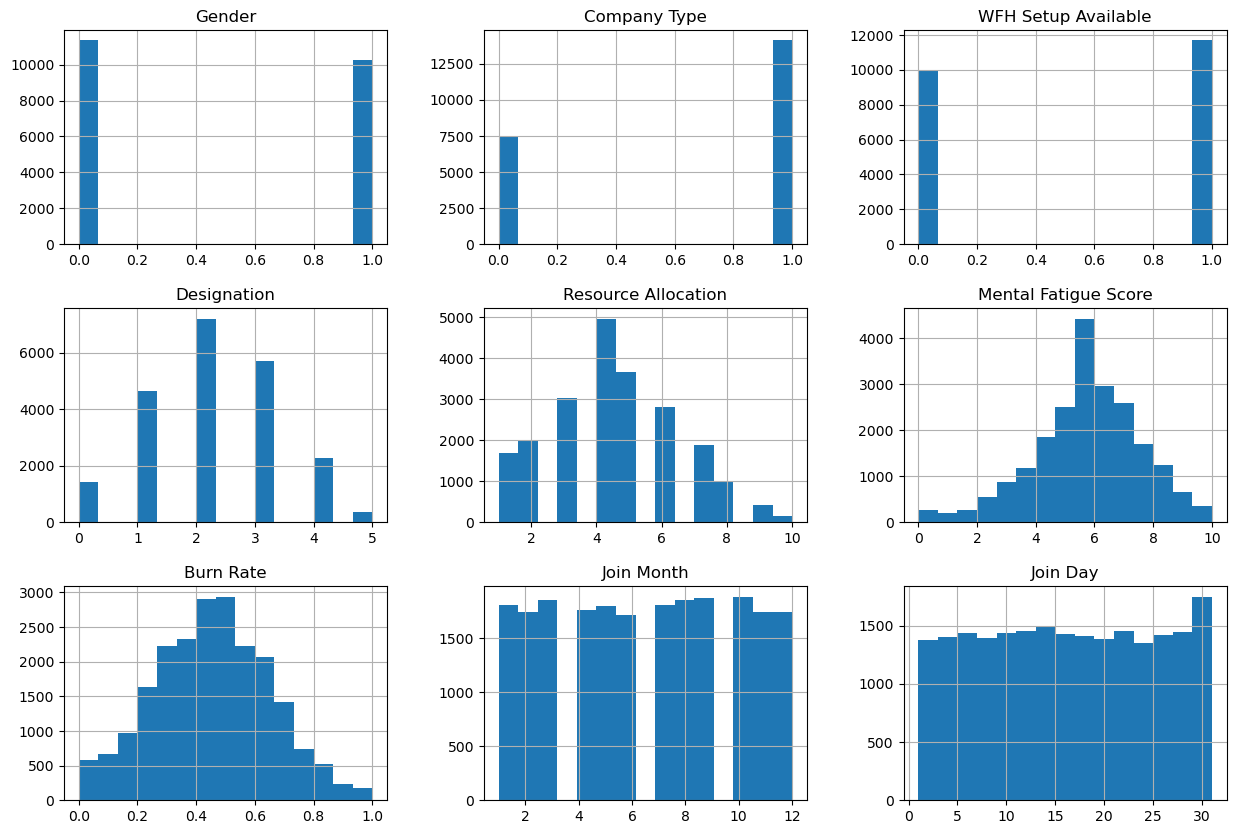

In [45]:
# Display histograms of each feature
data.hist(bins=15, figsize=(15, 10))
plt.show()

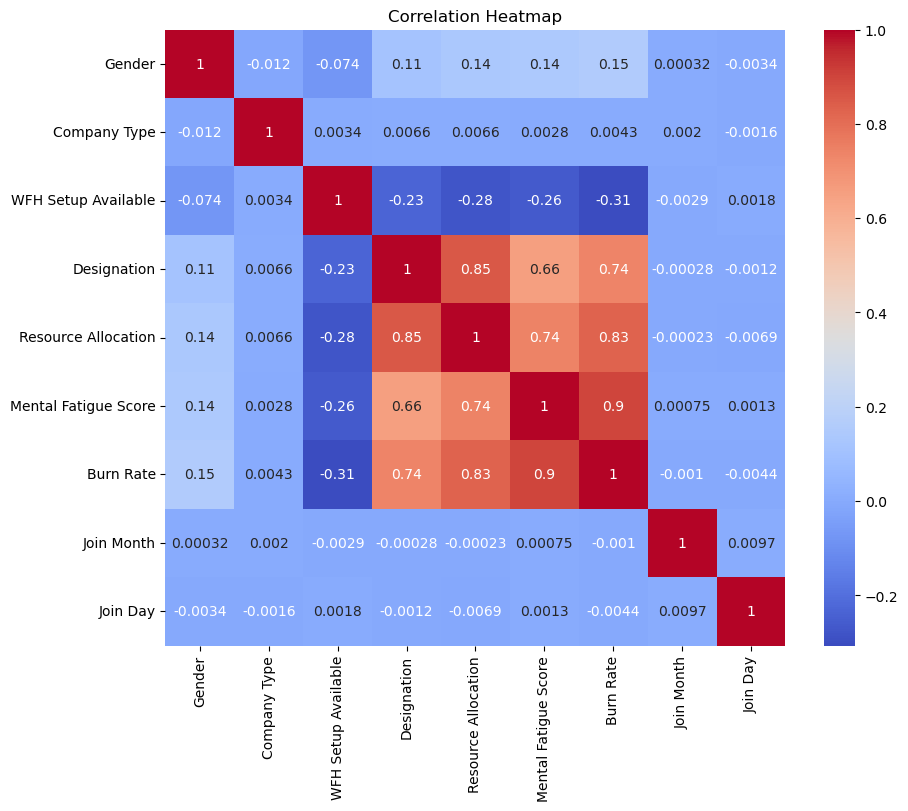

In [46]:
# Display correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

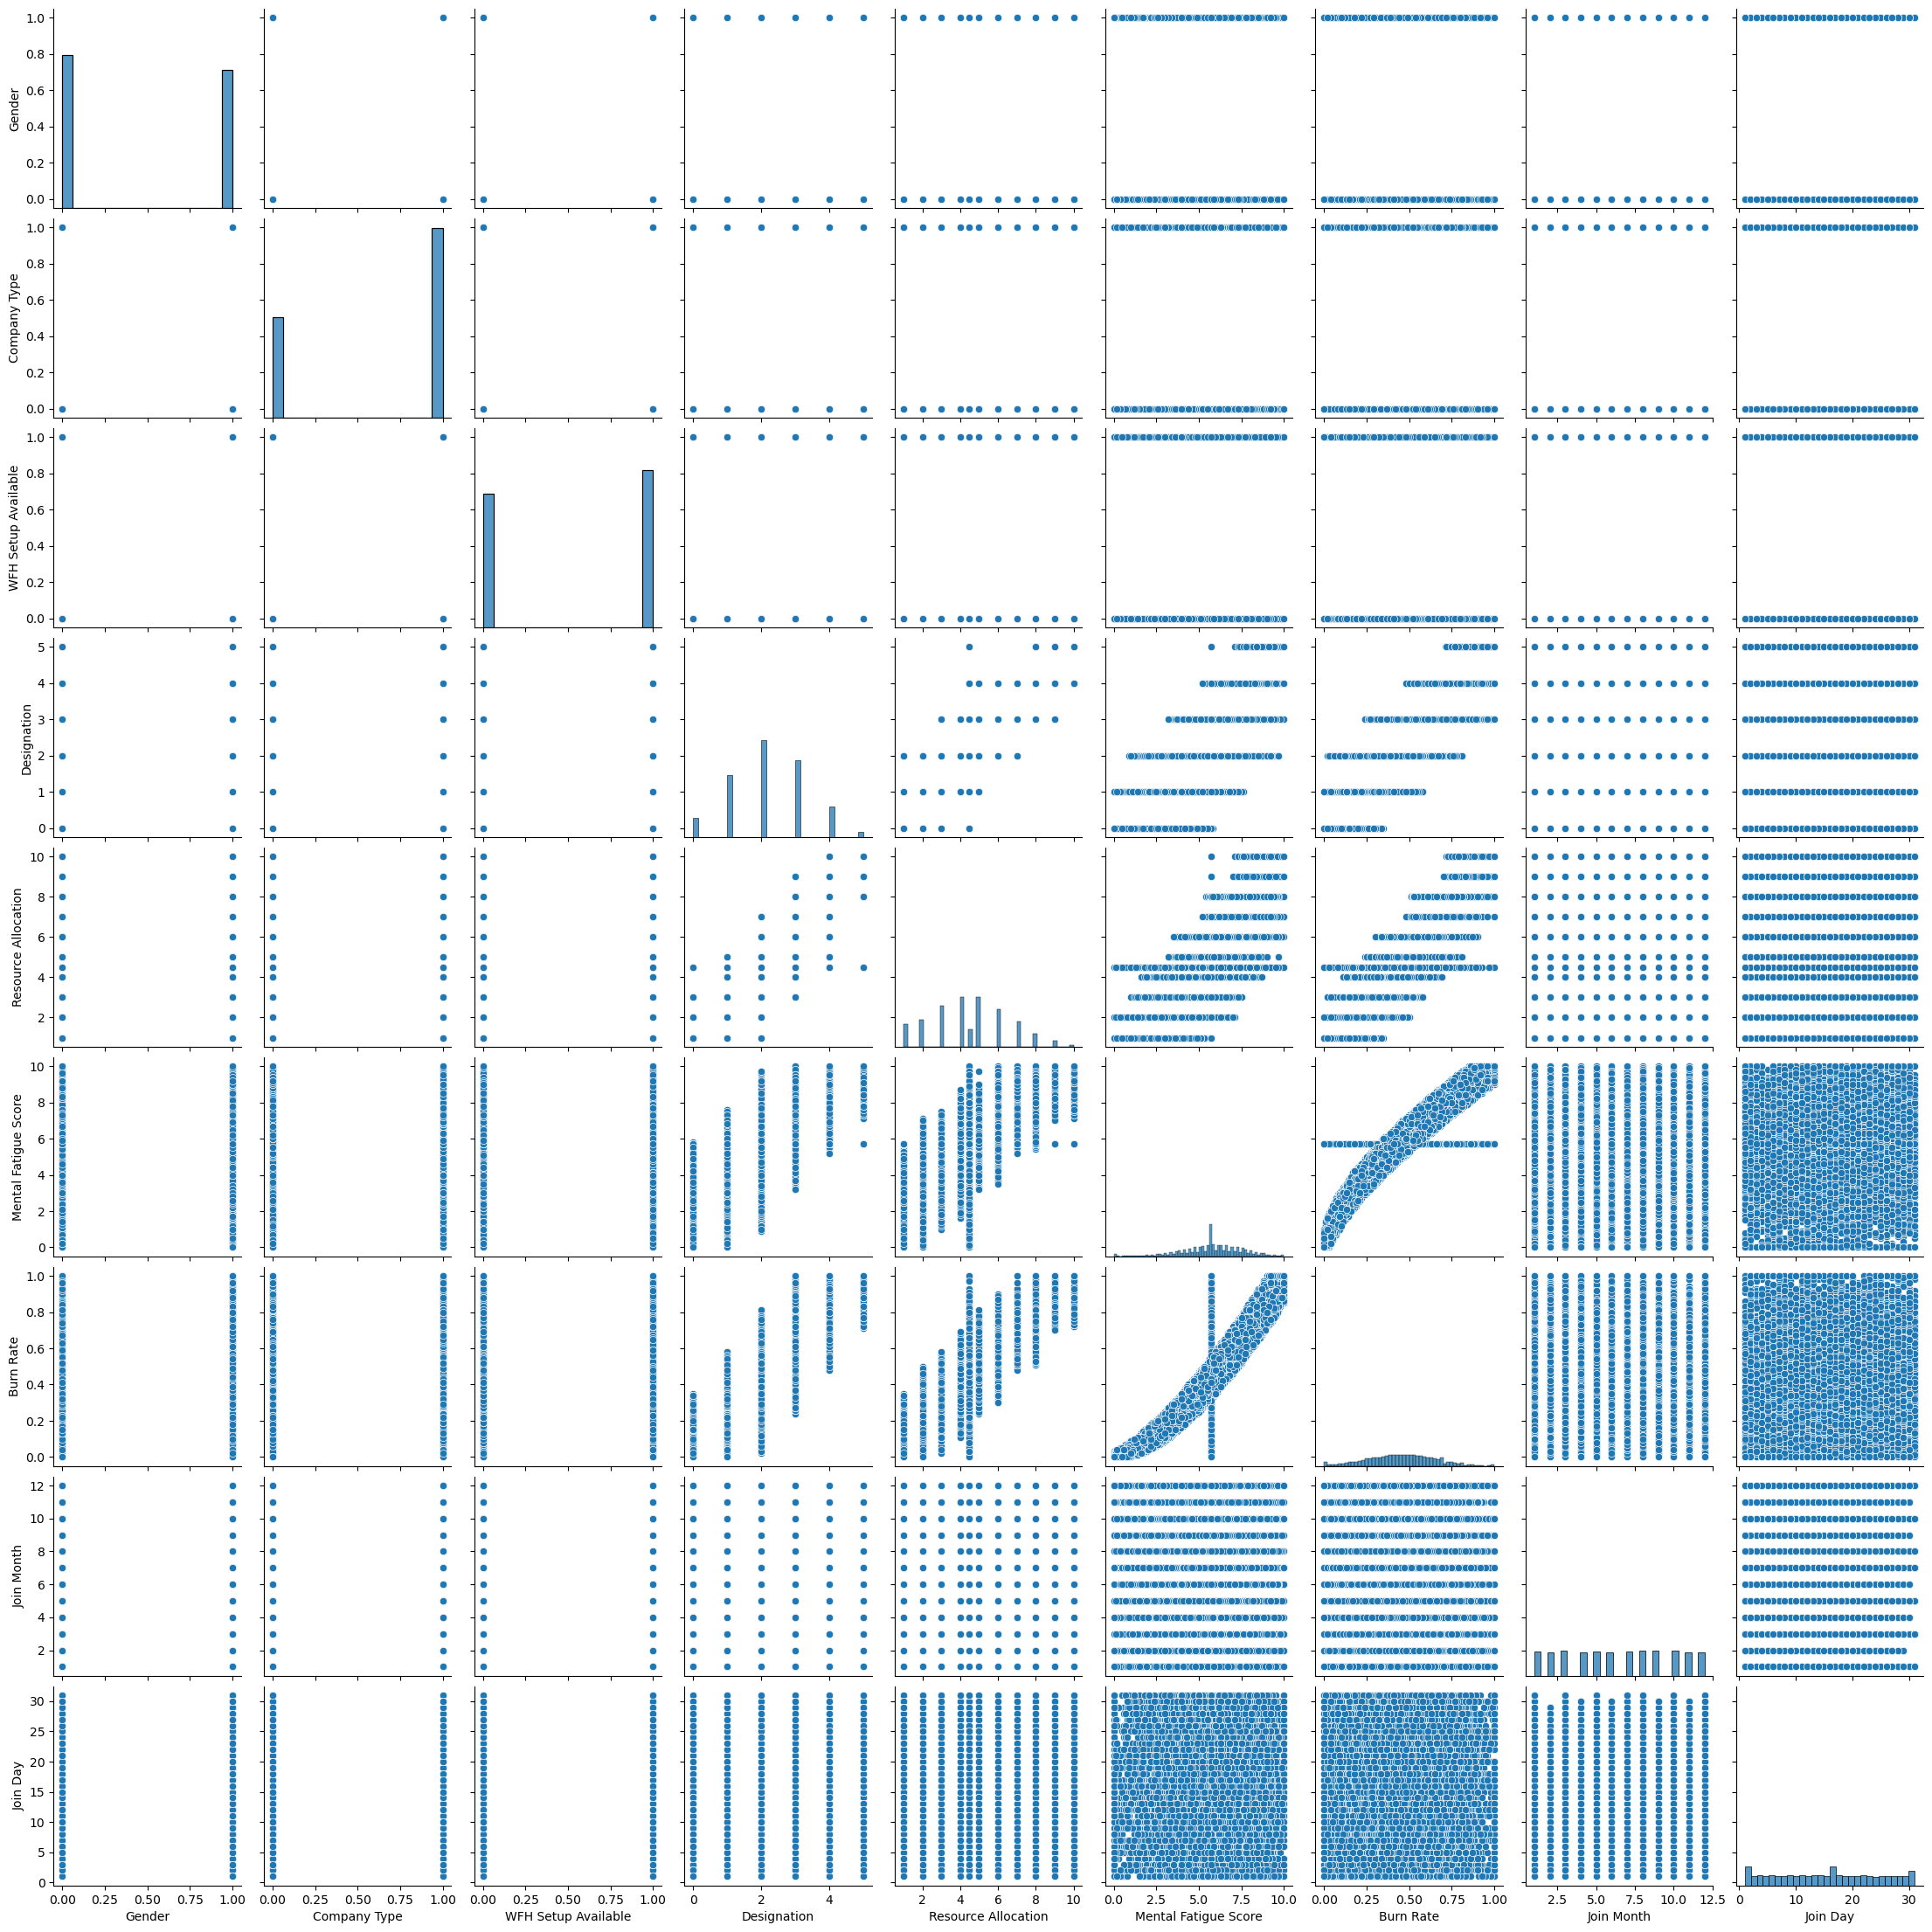

In [47]:
# Pairplot for feature relationships
sns.pairplot(data)
plt.show()

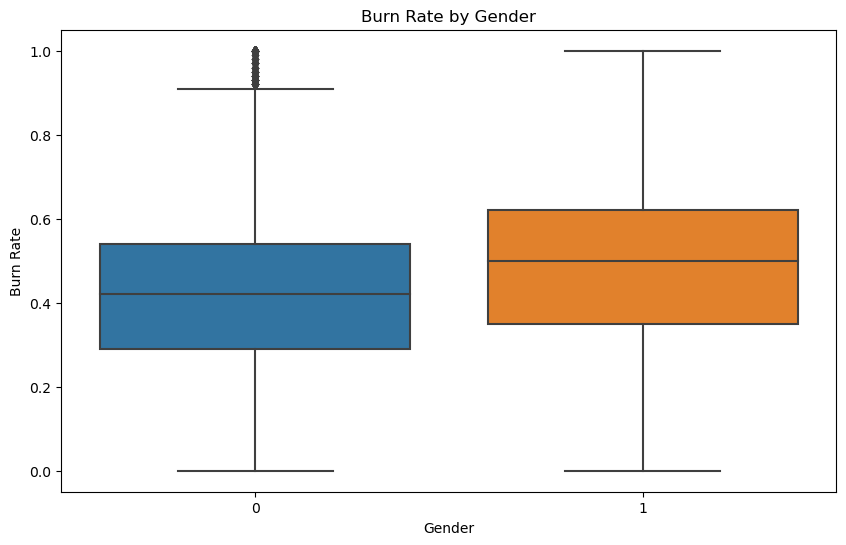

In [48]:
# Boxplot for categorical vs continuous variables
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Burn Rate', data=data)
plt.title('Burn Rate by Gender')
plt.show()

# PREPROCESSING STEPS

In [31]:
#drop employeeId column
data=data.drop('Employee ID',axis=1)

In [32]:
#Drop rows with missing target values
missing_target_rows=data.loc[data['Burn Rate'].isna(), :].index

In [33]:
data = data.drop(missing_target_rows, axis=0).reset_index(drop=True)


In [34]:
# Fill remaining missing values with column means
for column in ['Resource Allocation', 'Mental Fatigue Score']:
    data[column] = data[column].fillna(data[column].mean())

In [35]:
# Extract date features
data['Date of Joining'] = pd.to_datetime(data['Date of Joining'])
data['Join Month'] = data['Date of Joining'].apply(lambda x: x.month)
data['Join Day'] = data['Date of Joining'].apply(lambda x: x.day)
data = data.drop('Date of Joining', axis=1)

In [36]:
# Binary encoding
data['Gender'] = data['Gender'].replace({'Female': 0, 'Male': 1})
data['Company Type'] = data['Company Type'].replace({'Product': 0, 'Service': 1})
data['WFH Setup Available'] = data['WFH Setup Available'].replace({'No': 0, 'Yes': 1})

In [37]:
# Split data into features and target
y = data['Burn Rate']
X = data.drop('Burn Rate', axis=1)

In [38]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

In [39]:
# Scale features
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

In [40]:
# Initialize and train XGBoost model
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [41]:
# Evaluate the model
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

In [42]:

print(f'Training Score: {train_score}')
print(f'Testing Score: {test_score}')

Training Score: 0.9383634165070733
Testing Score: 0.9035718747799601
